<a href="https://colab.research.google.com/github/kjh8331267/AI_policy_analysis/blob/main/4_Topic_modeling_with_BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic modeling with BERTopic

## 1. Setting

In [ ]:
!pip install bertopic
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load library
import os
import pandas as pd
import numpy as np
import pickle

import re
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
import matplotlib.pyplot as plt


In [ ]:
from umap import UMAP
import seaborn as sns
import plotly.express as px

In [ ]:
# Load data
file_path = '/content/drive/MyDrive/kdis_python/python_project/'

with open(file_path + 'data.pkl', 'rb') as f:
    data = pickle.load(f)
data = data.reset_index(drop = True)

In [ ]:
display(data.head(3))
data.info()

Unnamed: 0  id                                              Title  \
0           1   2      AI Governance Alliance: Briefing Paper Series   
1           2   3        Using AI in Industrial Operations Guidebook   
2           3   4  COMMUNICATION FROM THE COMMISSION TO THE EUROP...   

  Translated title   Published  \
0              NaN  2024-01-18   
1              NaN  2023-10-09   
2              NaN  2024-01-25   

                                                 URL  \
0  https://www.weforum.org/publications/ai-govern...   
1  https://www.weforum.org/whitepapers/harnessing...   
2  https://webapi2016.eesc.europa.eu/v1/documents...   

                                             PDF URL Source ID  \
0  https://www3.weforum.org/docs/WEF_AI_Governanc...   weforum   
1  https://www3.weforum.org/docs/WEF_Harnessing_t...   weforum   
2  https://webapi2016.eesc.europa.eu/v1/documents...    eesceu   

                              Source Name Source Country  ...  \
0                    World Economic Forum            IGO  ...   
1                    World Economic Forum            IGO  ...   
2  European Economic and Social Committee             EU  ...   

  Policy Document Type                 Policy Document Authors  \
0          Publication                    World Economic Forum   
1          Publication                    World Economic Forum   
2          Publication  European Economic and Social Committee   

  Policy Document DOIs                                         Top Topics  \
0                  NaN  Governance ; Artificial intelligence ; Generat...   
1                  NaN  Artificial intelligence ; Machine learning ; C...   
2                  NaN  European High-Performance Computing Joint Unde...   

  Citations Citations (Including Same Source)  Languages  download_yn  \
0         0                                 0        eng            N   
1         0                                 0        eng            N   
2        23                                28        eng            Y   

                                           file_name  \
0  2_AI_Governance_Alliance__Briefing_Paper_Serie...   
1  3_Using_AI_in_Industrial_Operations_Guidebook.pdf   
2  4_COMMUNICATION_FROM_THE_COMMISSION_TO_THE_EUR...   

                                                text  
0  AI Governance Alliance  \nBriefing Paper Serie...  
1  Harnessing the  \nAI Revolution in  \nIndustri...  
2   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...  

[3 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         191 non-null    int64 
 1   id                                 191 non-null    int64 
 2   Title                              191 non-null    object
 3   Translated title                   5 non-null      object
 4   Published                          191 non-null    object
 5   URL                                191 non-null    object
 6   PDF URL                            191 non-null    object
 7   Source ID                          191 non-null    object
 8   Source Name                        191 non-null    object
 9   Source Country                     191 non-null    object
 10  Source Type                        191 non-null    object
 11  Policy Document ID                 191 non-null    object
 12  Policy D

In [ ]:
data

Unnamed: 0   id                                              Title  \
0             1    2      AI Governance Alliance: Briefing Paper Series   
1             2    3        Using AI in Industrial Operations Guidebook   
2             3    4  COMMUNICATION FROM THE COMMISSION TO THE EUROP...   
3             4    5  Szkolenia z zakresu AI dla nauczycieli szkół p...   
4             5    6  Can democracies cooperate with China on AI res...   
..          ...  ...                                                ...   
186         235  261                    Generative AI Framework for HMG   
187         237  263           CDEI publishes research on AI governance   
188         239  265  Patient-First Health with Generative AI: Resha...   
189         240  266  Synthetic Politics: Preparing democracy for Ge...   
190         241  267  OSTP RFI on National Priorities for Artificial...   

                            Translated title   Published  \
0                                        NaN  2024-01-18   
1                                        NaN  2023-10-09   
2                                        NaN  2024-01-25   
3    AI training for primary school teachers  2024-01-27   
4                                        NaN  2023-01-09   
..                                       ...         ...   
186                                      NaN  2024-01-18   
187                                      NaN  2023-03-29   
188                                      NaN  2024-01-12   
189                                      NaN  2024-03-26   
190                                      NaN  2023-07-06   

                                                   URL  \
0    https://www.weforum.org/publications/ai-govern...   
1    https://www.weforum.org/whitepapers/harnessing...   
2    https://webapi2016.eesc.europa.eu/v1/documents...   
3    https://efs-archiwum.men.gov.pl/wp-content/upl...   
4    https://www.brookings.edu/research/can-democra...   
..                                                 ...   
186  https://www.gov.uk/government/publications/gen...   
187  https://www.gov.uk/government/publications/cde...   
188  https://www.weforum.org/publications/patient-f...   
189  https://demos.co.uk/research/synthetic-politic...   
190  https://bipartisanpolicy.org/letter/ostp-rfi-o...   

                                               PDF URL           Source ID  \
0    https://www3.weforum.org/docs/WEF_AI_Governanc...             weforum   
1    https://www3.weforum.org/docs/WEF_Harnessing_t...             weforum   
2    https://webapi2016.eesc.europa.eu/v1/documents...              eesceu   
3    https://efs-archiwum.men.gov.pl/wp-content/upl...  governmentofpoland   
4    https://www.brookings.edu/wp-content/uploads/2...           brookings   
..                                                 ...                 ...   
186  https://assets.publishing.service.gov.uk/media...               govuk   
187  https://assets.publishing.service.gov.uk/gover...               govuk   
188  https://www3.weforum.org/docs/WEF_Patient_Firs...             weforum   
189  https://demos.co.uk/wp-content/uploads/2024/03...               demos   
190  https://bipartisanpolicy.org/wp-content/upload...          bipartisan   

                                Source Name Source Country  ...  \
0                      World Economic Forum            IGO  ...   
1                      World Economic Forum            IGO  ...   
2    European Economic and Social Committee             EU  ...   
3                      Government of Poland         Poland  ...   
4                     Brookings Institution            USA  ...   
..                                      ...            ...  ...   
186                       The UK Government             UK  ...   
187                       The UK Government             UK  ...   
188                    World Economic Forum            IGO  ...   
189                              Demos - UK             UK  ...   
190         

## 2. Preprocessing

In [ ]:

# Preprocessing documents
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Leave only English text
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b(date order|days date|verdate sep)\b', ' ', text).strip()  # Delete a specific text pattern
    text = re.sub(r'artificial intelligence', 'ai', text)
    text = re.sub(r'\s+', ' ', text)

    return text

data['cleaned_doc'] = data['text'].apply(preprocess_text)
data.loc[~data['Translated title'].isna(), 'Title'] = data.loc[~data['Translated title'].isna(), 'Translated title']

lst_european_countries = ['EU', 'UK', 'Spain', 'France', 'Germany', 'Netherlands', 'Sweden',
                    'Austria', 'Belgium', 'Switzerland', 'Poland', 'Italy', 'IGO']

data['Country'] = data['Source Country'].apply(lambda x: 'Europe' if x in lst_european_countries else 'USA' if x == 'USA' else x)

## 3. Bertopic

In [ ]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=5, n_components=2, metric='cosine', random_state=42, min_dist=0.1)


# Set vague, common, redundant, or meaningless words as stopwords
custom_stop_words = ["po", "frm", "fmt", "sfmt","jkt", 'page', "retrieved", "november", "et", "al", "vol", "pp", "doi", "org",
    "https", "use", "based", "case", 'date', 'days', 'efrfmnoesgm' ,'noeddrumheller', 'wednesday', 'dskrnprod', 'dskjmxxprod', 'ehrochdxxx'
    "data", "information", "new", "used", "work", "order", "systems", "model", "models", "tools",
    "shall", "act", "section", "including", "level", "appropriate", "development", "and", "for", "of",
    "the", "to", "international", "technology", "impact", "project", "principles", "content",
    # "ai", "human", "government", "federal", "public", "policy", "security",
    "technologies", "national", "agency", "support", "example", "potential", "using",
    "develop", "help", "programs", "including", "research"
] # , "gipinst", "en", "adtcm",  "annex", "gao"
all_stop_words = list(set(custom_stop_words) | set(CountVectorizer(stop_words="english").get_stop_words()))
# Tokenize topics
vectorizer_model = CountVectorizer(ngram_range=(2, 2), stop_words=all_stop_words, min_df=1)

# Conduct BERTopic
topic_model = BERTopic(umap_model=umap_model, vectorizer_model=vectorizer_model, min_topic_size=5, top_n_words=30)
topics, probabilities = topic_model.fit_transform(data['cleaned_doc'])


# topic results
data_with_topic = pd.concat([data.reset_index(drop = True), topic_model.get_document_info(data['cleaned_doc']).reset_index(drop = True)], axis = 1)
data_with_topic = data_with_topic.drop(['text'], axis = 1)
topic_info = topic_model.get_topic_info()


In [ ]:
topic_info

Topic  Count                                               Name  \
0      -1     44  -1_human rights_responsible ai_generative ai_m...   
1       0     27         0_high risk_risk ai_gipinst en_adtcm annex   
2       1     24    1_generative ai_south korea_ai safety_ai sector   
3       2     17  2_ai governance_united nations_generative ai_c...   
4       3     12  3_generative ai_ai factories_framework hm_hm g...   
5       4     11  4_public standards_public life_generative ai_a...   
6       5     10   5_human rights_facial recognition_ai human_ai ai   
7       6     10  6_ai health_health care_ai healthcare_tai play...   
8       7     10  7_gao ai_ai implementation_federal agencies_ai...   
9       8      9      8_ai exposure_people feel_feel ai_exposure ai   
10      9      7  9_ai dss_machine learning_climate change_ai se...   
11     10      5  10_reporting ai_ai education_ai journalism_for...   
12     11      5  11_united states_federal government_homeland s...   

                                       Representation  \
0   [human rights, responsible ai, generative ai, ...   
1   [high risk, risk ai, gipinst en, adtcm annex, ...   
2   [generative ai, south korea, ai safety, ai sec...   
3   [ai governance, united nations, generative ai,...   
4   [generative ai, ai factories, framework hm, hm...   
5   [public standards, public life, generative ai,...   
6   [human rights, facial recognition, ai human, a...   
7   [ai health, health care, ai healthcare, tai pl...   
8   [gao ai, ai implementation, federal agencies, ...   
9   [ai exposure, people feel, feel ai, exposure a...   
10  [ai dss, machine learning, climate change, ai ...   
11  [reporting ai, ai education, ai journalism, fo...   
12  [united states, federal government, homeland s...   

                                  Representative_Docs  
0   [global assessment of responsible ai in cities...  
1   [study eprs european parliamentary research se...  
2   [policy brief generative ai dr ann kristin gle...  
3   [ai governance alliance briefing paper series ...  
4   [aldsrlv compet en council of the european uni...  
5   [committee on standards in public life submiss...  
6   [ai as a black box for the society study condu...  
7   [scaling smart solutions with ai in health unl...  
8   [artificial intelligence fully implementing ke...  
9   [the authors would like to thank florence jaum...  
10  [ai and related technologies in military decis...  
11  [report the governance of ai in public service...  
12  [highlights of the executive order on ai for c...

In [ ]:
topic_info[['Topic', 'Count', 'Name', 'Representation']].to_excel(file_path+'topic_info2.xlsx')

In [ ]:
data_with_topic.head()

Unnamed: 0  id                                              Title  \
0           1   2      AI Governance Alliance: Briefing Paper Series   
1           2   3        Using AI in Industrial Operations Guidebook   
2           3   4  COMMUNICATION FROM THE COMMISSION TO THE EUROP...   
3           4   5            AI training for primary school teachers   
4           5   6  Can democracies cooperate with China on AI res...   

                          Translated title   Published  \
0                                      NaN  2024-01-18   
1                                      NaN  2023-10-09   
2                                      NaN  2024-01-25   
3  AI training for primary school teachers  2024-01-27   
4                                      NaN  2023-01-09   

                                                 URL  \
0  https://www.weforum.org/publications/ai-govern...   
1  https://www.weforum.org/whitepapers/harnessing...   
2  https://webapi2016.eesc.europa.eu/v1/documents...   
3  https://efs-archiwum.men.gov.pl/wp-content/upl...   
4  https://www.brookings.edu/research/can-democra...   

                                             PDF URL           Source ID  \
0  https://www3.weforum.org/docs/WEF_AI_Governanc...             weforum   
1  https://www3.weforum.org/docs/WEF_Harnessing_t...             weforum   
2  https://webapi2016.eesc.europa.eu/v1/documents...              eesceu   
3  https://efs-archiwum.men.gov.pl/wp-content/upl...  governmentofpoland   
4  https://www.brookings.edu/wp-content/uploads/2...           brookings   

                              Source Name Source Country  ...  \
0                    World Economic Forum            IGO  ...   
1                    World Economic Forum            IGO  ...   
2  European Economic and Social Committee             EU  ...   
3                    Government of Poland         Poland  ...   
4                   Brookings Institution            USA  ...   

                                         cleaned_doc Country  \
0  ai governance alliance briefing paper series j...  Europe   
1  harnessing the ai revolution in industrial ope...  Europe   
2  en en european commission brussels com final c...  Europe   
3  standardy kompetencji cyfrowych nauczycieli ob...  Europe   
4  can democracies cooperate with china on ai res...     USA   

                                            Document Topic  \
0  ai governance alliance briefing paper series j...     2   
1  harnessing the ai revolution in industrial ope...     2   
2  en en european commission brussels com final c...     3   
3  standardy kompetencji cyfrowych nauczycieli ob...     0   
4  can democracies cooperate with china on ai res...    -1   

                                                Name  \
0  2_ai governance_united nations_generative ai_c...   
1  2_ai governance_united nations_generative ai_c...   
2  3_generative ai_ai factories_framework hm_hm g...   
3         0_high risk_risk ai_gipinst en_adtcm annex   
4  -1_human rights_responsible ai_generative ai_m...   

                                      Representation  \
0  [ai governance, united nations, generative ai,...   
1  [ai governance, united nations, generative ai,...   
2  [generative ai, ai factories, framework hm, hm...   
3  [high risk, risk ai, gipinst en, adtcm annex, ...   
4  [human rights, responsible ai, generative ai, ...   

                                 Representative_Docs  \
0  [ai governance alliance briefing paper series ...   
1  [ai governance alliance briefing paper series ...   
2  [aldsrlv compet en council of the european uni...   
3  [study eprs european parliamentary research se...   
4  [global assessment of responsible ai in cities...   

                                         Top_n_words Probability  \
0  ai governance - united nations - generative ai...    0.714626   
1  ai governance - united nations - generative ai...    0.710553   
2  generative ai - ai factories - framework hm - ...    0.76260

In [ ]:
data_with_topic.to_excel(file_path + 'data_with_topic.xlsx')

In [ ]:
# 데이터를 pickle 파일로 저장하는 함수
with open(file_path + 'data_with_topic.pkl', 'wb') as file:
    pickle.dump(data_with_topic, file)

Unnamed: 0   id                                              Title  \
0             1    2      AI Governance Alliance: Briefing Paper Series   
1             2    3        Using AI in Industrial Operations Guidebook   
2             3    4  COMMUNICATION FROM THE COMMISSION TO THE EUROP...   
3             4    5            AI training for primary school teachers   
4             5    6  Can democracies cooperate with China on AI res...   
..          ...  ...                                                ...   
186         235  261                    Generative AI Framework for HMG   
187         237  263           CDEI publishes research on AI governance   
188         239  265  Patient-First Health with Generative AI: Resha...   
189         240  266  Synthetic Politics: Preparing democracy for Ge...   
190         241  267  OSTP RFI on National Priorities for Artificial...   

                            Translated title   Published  \
0                                        NaN  2024-01-18   
1                                        NaN  2023-10-09   
2                                        NaN  2024-01-25   
3    AI training for primary school teachers  2024-01-27   
4                                        NaN  2023-01-09   
..                                       ...         ...   
186                                      NaN  2024-01-18   
187                                      NaN  2023-03-29   
188                                      NaN  2024-01-12   
189                                      NaN  2024-03-26   
190                                      NaN  2023-07-06   

                                                   URL  \
0    https://www.weforum.org/publications/ai-govern...   
1    https://www.weforum.org/whitepapers/harnessing...   
2    https://webapi2016.eesc.europa.eu/v1/documents...   
3    https://efs-archiwum.men.gov.pl/wp-content/upl...   
4    https://www.brookings.edu/research/can-democra...   
..                                                 ...   
186  https://www.gov.uk/government/publications/gen...   
187  https://www.gov.uk/government/publications/cde...   
188  https://www.weforum.org/publications/patient-f...   
189  https://demos.co.uk/research/synthetic-politic...   
190  https://bipartisanpolicy.org/letter/ostp-rfi-o...   

                                               PDF URL           Source ID  \
0    https://www3.weforum.org/docs/WEF_AI_Governanc...             weforum   
1    https://www3.weforum.org/docs/WEF_Harnessing_t...             weforum   
2    https://webapi2016.eesc.europa.eu/v1/documents...              eesceu   
3    https://efs-archiwum.men.gov.pl/wp-content/upl...  governmentofpoland   
4    https://www.brookings.edu/wp-content/uploads/2...           brookings   
..                                                 ...                 ...   
186  https://assets.publishing.service.gov.uk/media...               govuk   
187  https://assets.publishing.service.gov.uk/gover...               govuk   
188  https://www3.weforum.org/docs/WEF_Patient_Firs...             weforum   
189  https://demos.co.uk/wp-content/uploads/2024/03...               demos   
190  https://bipartisanpolicy.org/wp-content/upload...          bipartisan   

                                Source Name Source Country  ...  \
0                      World Economic Forum            IGO  ...   
1                      World Economic Forum            IGO  ...   
2    European Economic and Social Committee             EU  ...   
3                      Government of Poland         Poland  ...   
4                     Brookings Institution            USA  ...   
..                                      ...            ...  ...   
186                       The UK Government             UK  ...   
187                       The UK Government             UK  ...   
188                    World Economic Forum            IGO  ...   
189                              Demos - UK             UK  ...   
190         

In [ ]:
data_with_topic.columns

Index(['Unnamed: 0', 'id', 'Title', 'Translated title', 'Published', 'URL',
       'PDF URL', 'Source ID', 'Source Name', 'Source Country', 'Source Type',
       'Policy Document ID', 'Policy Document Type', 'Policy Document Authors',
       'Policy Document DOIs', 'Top Topics', 'Citations',
       'Citations (Including Same Source)', 'Languages', 'download_yn',
       'file_name', 'cleaned_doc', 'Country', 'Document', 'Topic', 'Name',
       'Representation', 'Representative_Docs', 'Top_n_words', 'Probability',
       'Representative_document'],
      dtype='object')

## 4. Visualization

### 4-1. Check topic results

In [ ]:
!pip install -U kaleido


In [ ]:
import plotly.io as pio
import matplotlib.pyplot as plt

In [ ]:
# topic_word_scored
topic_word_scored = topic_model.visualize_barchart()
topic_word_scored.write_html(file_path+"graph/[All]topic_word_scored.html")
topic_word_scored

In [ ]:
# # topics_over_time
# topics_over_time = topic_model.topics_over_time(data.text, pd.to_datetime(data.Published, format="%Y-%m-%d"), nr_bins=50)
# n_topic = topic_model.get_topic_freq().shape[0]-1
# topics_over_time = topic_model.visualize_topics_over_time(topics_over_time, topics=list(range(n_topic)))
# topics_over_time

In [ ]:
# similarity_mat
similarity_mat = topic_model.visualize_heatmap()
similarity_mat.write_html(file_path+"graph/[All]similarity_mat.html")
display(similarity_mat)

In [ ]:
# intertopic_dist_map
intertopic_dist_map = topic_model.visualize_topics()
intertopic_dist_map.write_html(file_path+"graph/[All]intertopic_dist_map.html")
display(intertopic_dist_map)

In [ ]:
# Hierarchical topics
hierarchy = topic_model.visualize_hierarchy()
hierarchy.write_html(file_path+"graph/[All]hierarchy.html")
display(hierarchy)

In [ ]:
file_path + f"graph/[All]wordcloud_topic_{topic}.png"

'/content/drive/MyDrive/kdis_python/python_project/graph/[All]wordcloud_topic_11.png'

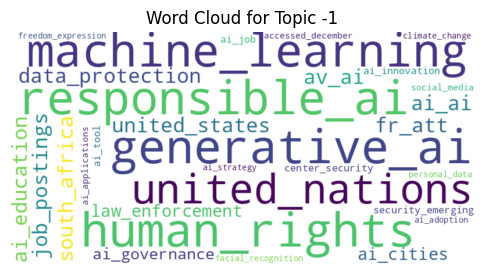

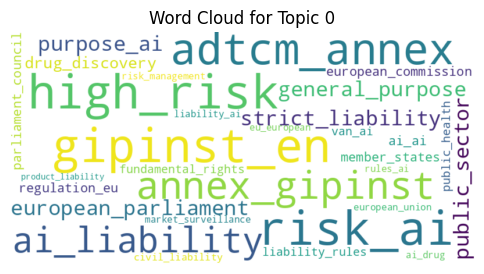

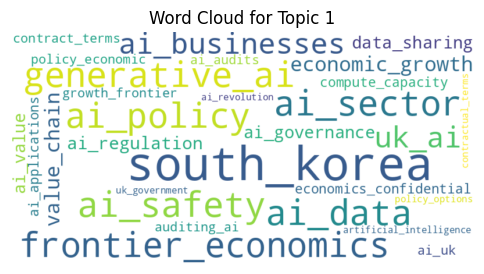

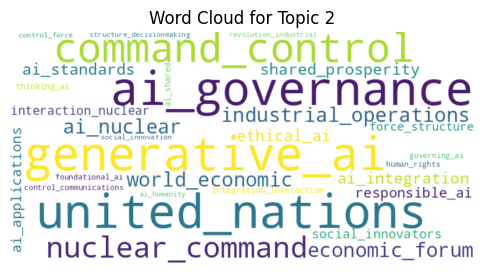

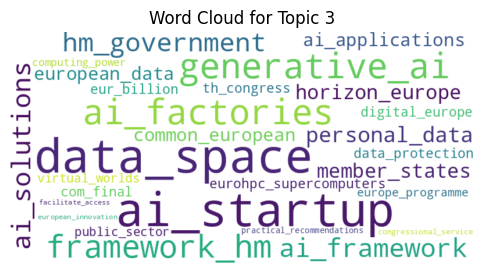

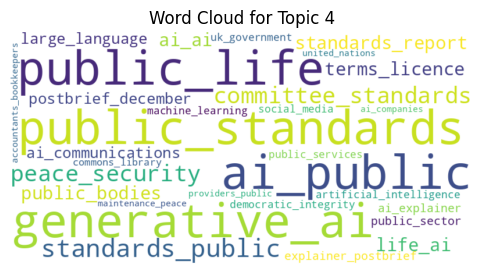

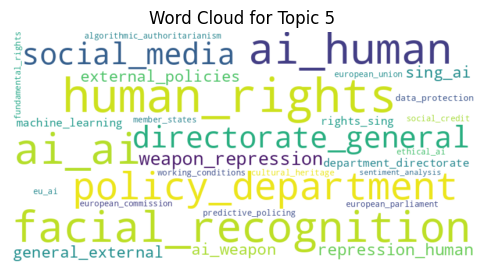

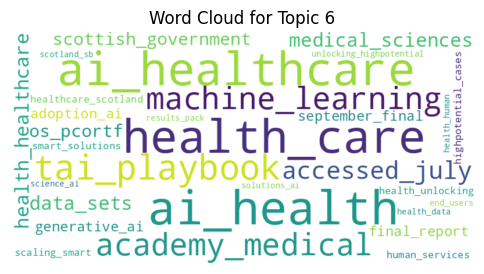

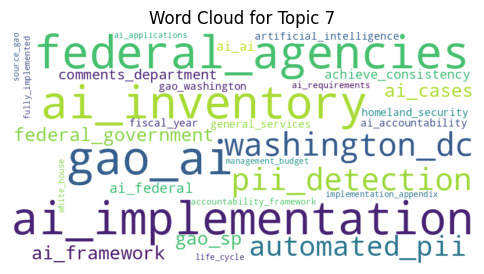

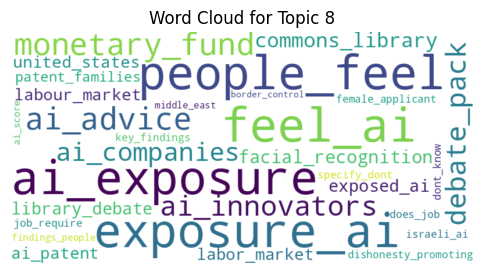

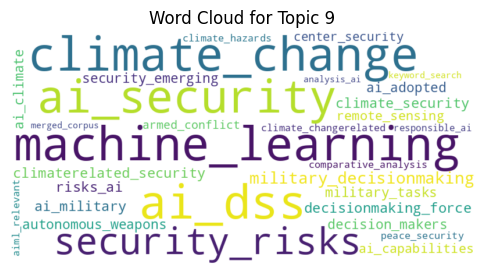

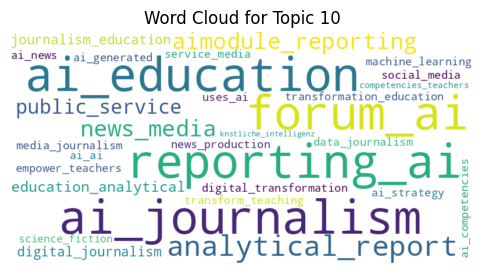

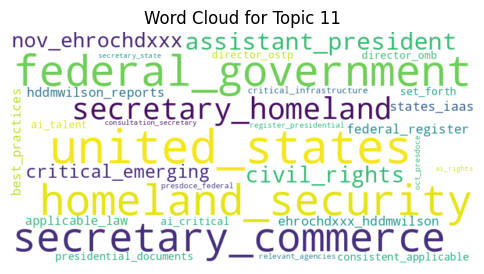

In [ ]:
from wordcloud import WordCloud

# Word cloud by topic
for _, row in topic_info.iterrows():
    topic = row['Topic']
    bigrams = ' '.join(['_'.join(word.split()) for word in row['Representation']]) # Combine the words in 'Representation' for word cloud generation

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white", max_font_size=80, min_font_size=10).generate(bigrams)

    # Plotting the word cloud
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic}")

    plt.savefig(file_path + f"graph/[All]wordcloud_topic_{topic}.png", format="png", dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
# # term_score_decline_per_topic
# term_score_decline_per_topic = topic_model.visualize_term_rank()
# # term_score_decline_per_topic.write_html(file_path+"term_score_decline_per_topic.html")
# term_score_decline_per_topic

### 4-2. Check topic results by country

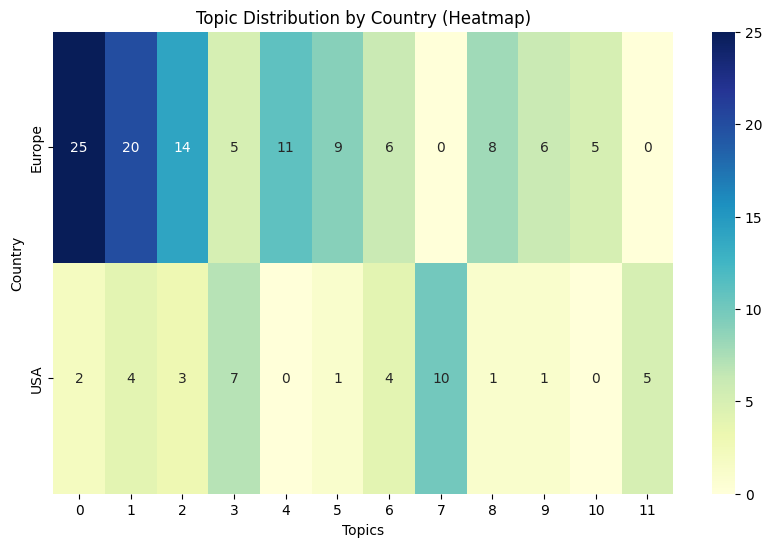

In [ ]:
country_topic_counts = data_with_topic[data_with_topic.Topic != -1].groupby(["Country", "Topic"]).size().unstack(fill_value=0)
# print("Topic Frequency by Country:\n", country_topic_counts)
plt.figure(figsize=(10, 6))
sns.heatmap(country_topic_counts, annot=True, cmap="YlGnBu", cbar=True, fmt="d")
plt.title("Topic Distribution by Country (Heatmap)")
plt.xlabel("Topics")
plt.ylabel("Country")
plt.savefig(file_path + "graph/[Country]topic_distribution_by_country_heatmap.png", format="png", dpi=300, bbox_inches="tight")

plt.show()
# t = pd.crosstab(data_with_topic['Topic'], data_with_topic['Source Country'])

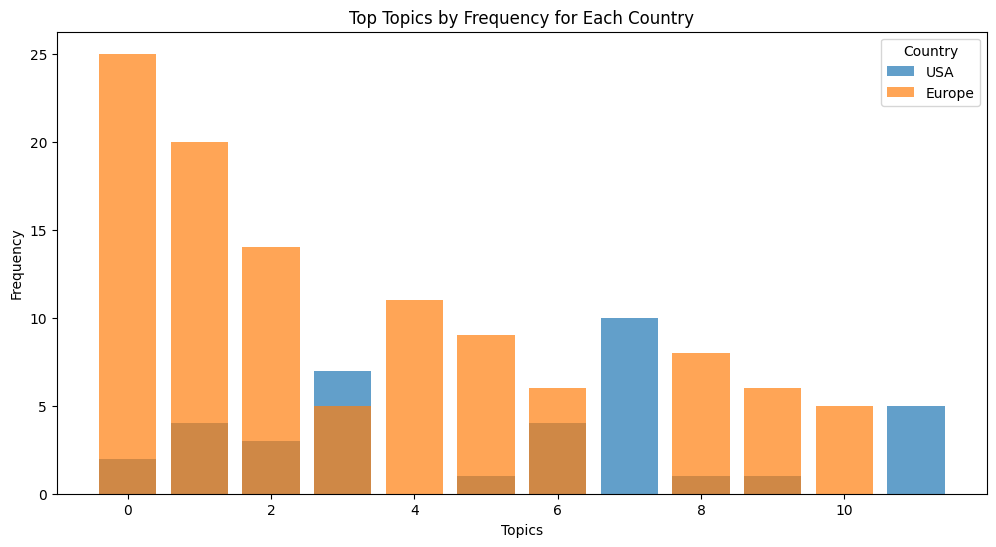

In [ ]:
# Find top topics for each country by sorting and selecting top 3 topics for demonstration
top_topics_country_a = country_topic_counts.loc["USA"]#.nlargest(10)
top_topics_country_b = country_topic_counts.loc["Europe"]#.nlargest(10)

# Creating a bar chart for the top topics in each country
plt.figure(figsize=(12, 6))
plt.bar(top_topics_country_a.index, top_topics_country_a.values, label="USA", alpha=0.7)
plt.bar(top_topics_country_b.index, top_topics_country_b.values, label="Europe", alpha=0.7)

# Adding titles and labels
plt.title("Top Topics by Frequency for Each Country")
plt.xlabel("Topics")
plt.ylabel("Frequency")
plt.legend(title="Country")
plt.savefig(file_path + "graph/[Country]Top Topics by Frequency for Each Country.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
embeddings = topic_model.embedding_model.embed(data["cleaned_doc"])
embeddings = umap_model.fit_transform(embeddings)

umap_df = pd.DataFrame(embeddings, columns=["UMAP_1", "UMAP_2"])
umap_df["Topic"] = topics
umap_df["Country"] = data["Country"]
umap_df["Title"] = data["Title"]

fig = px.scatter(
    umap_df,
    x="UMAP_1",
    y="UMAP_2",
    color="Country",
    hover_name="Title",
    title="UMAP Visualization of BERTopic Embeddings by Country",
    labels={"UMAP_1": "UMAP Dimension 1", "UMAP_2": "UMAP Dimension 2"}
)
fig.write_html(file_path+"graph/[Country]UMAP Visualization of BERTopic Embeddings by Country.html")
fig.show()

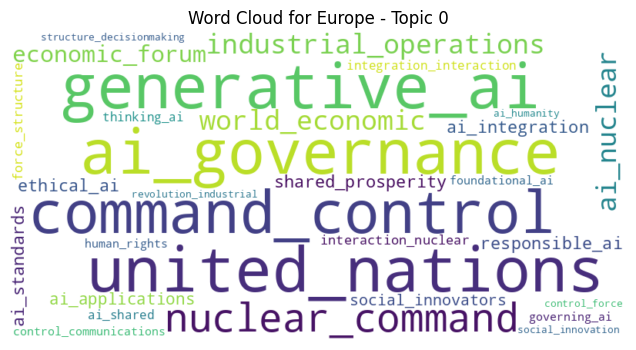

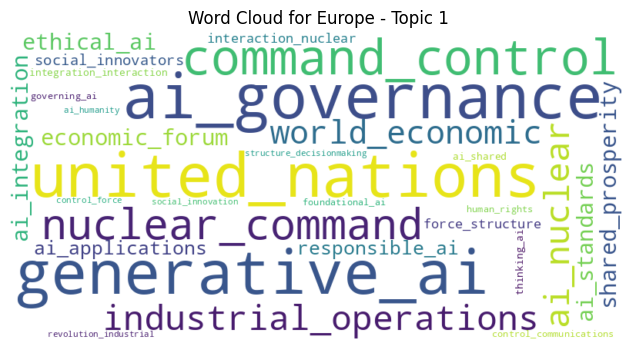

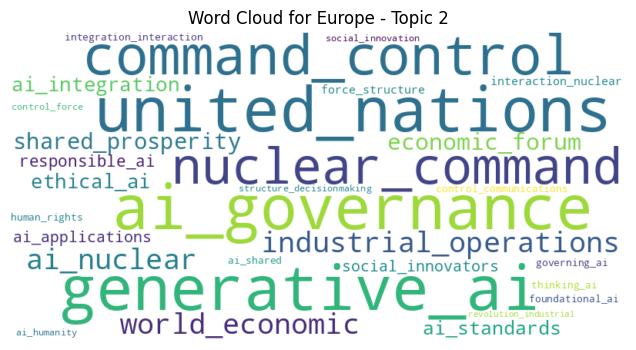

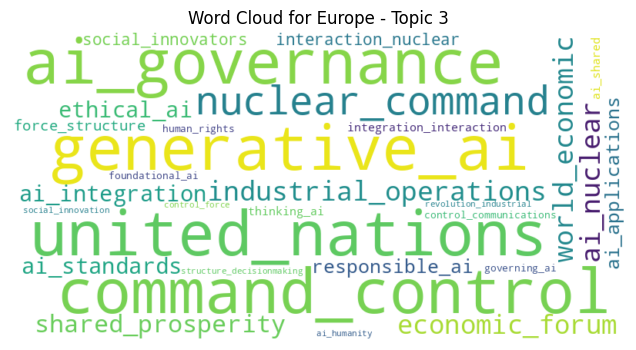

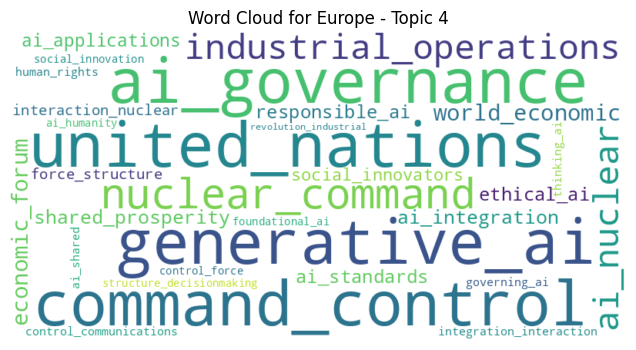

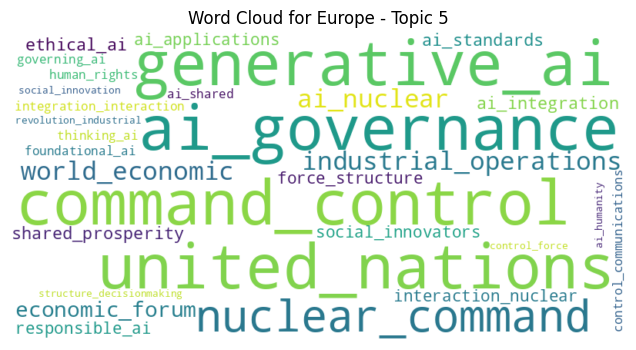

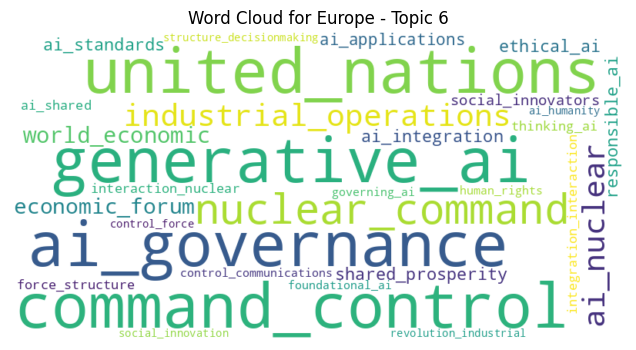

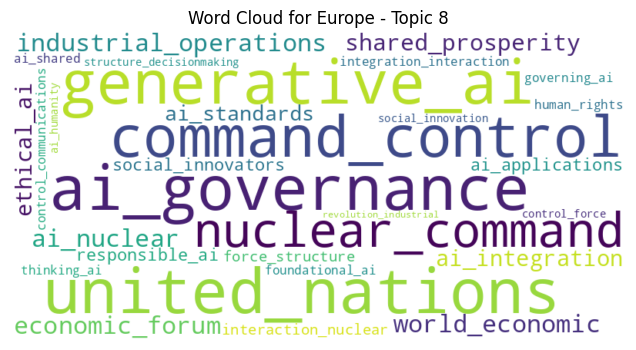

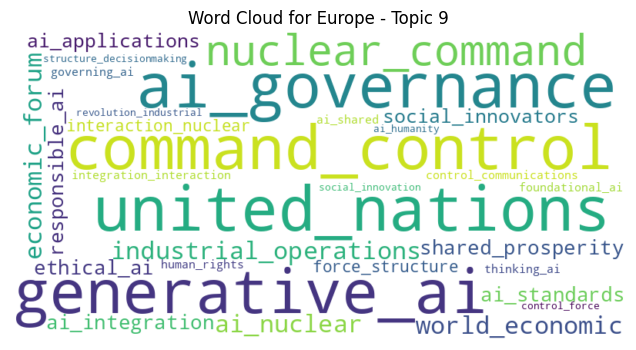

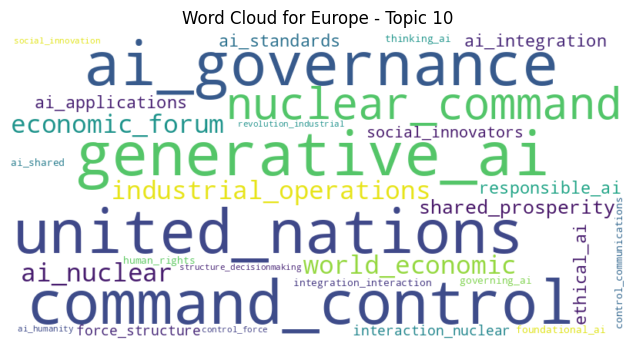

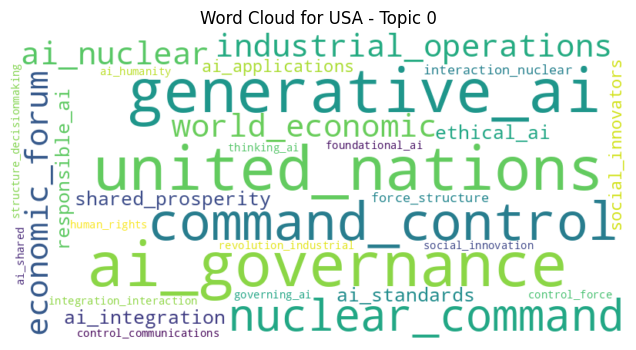

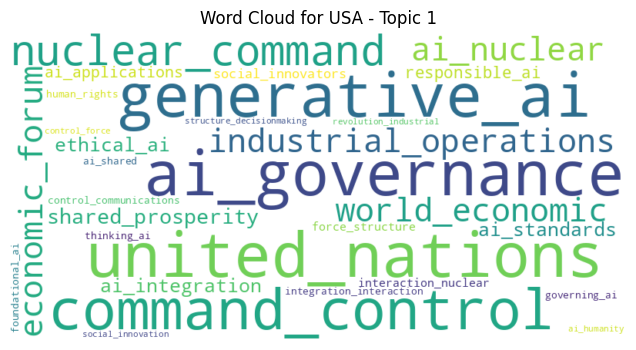

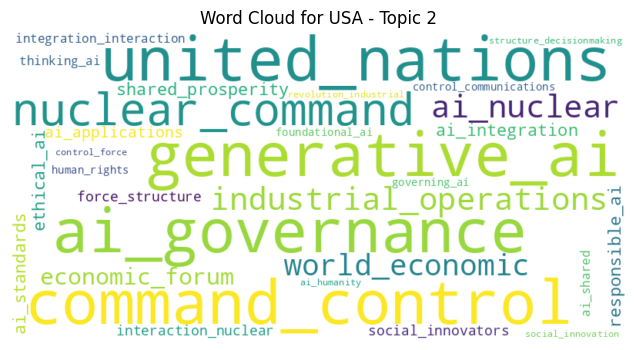

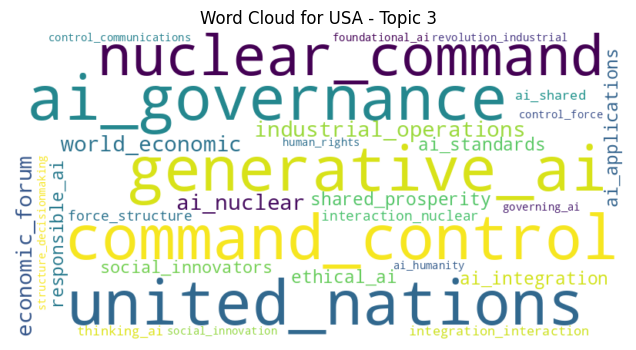

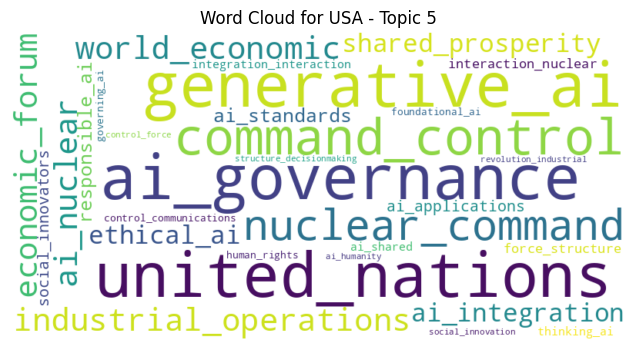

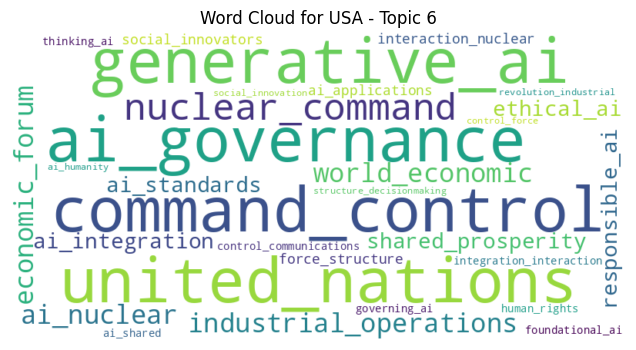

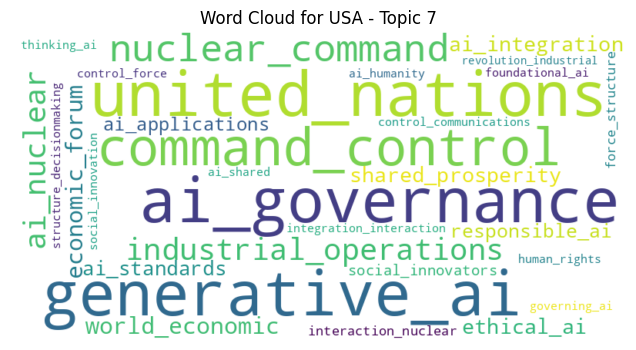

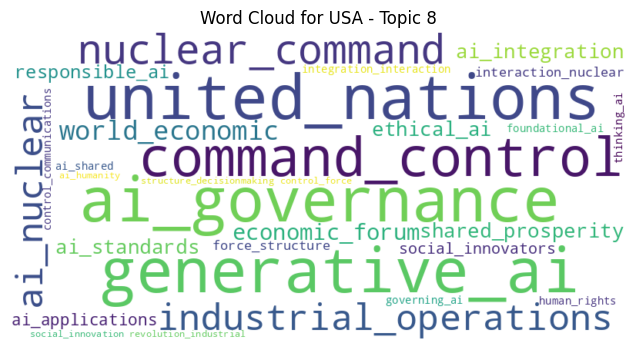

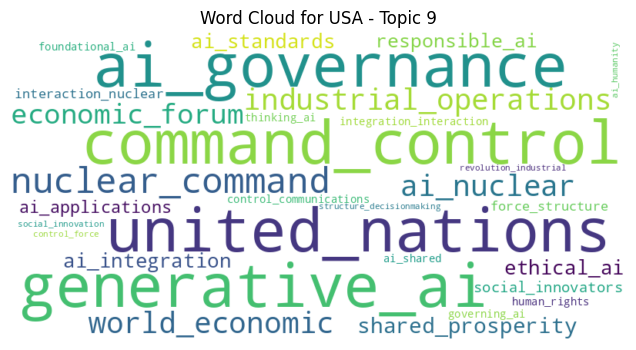

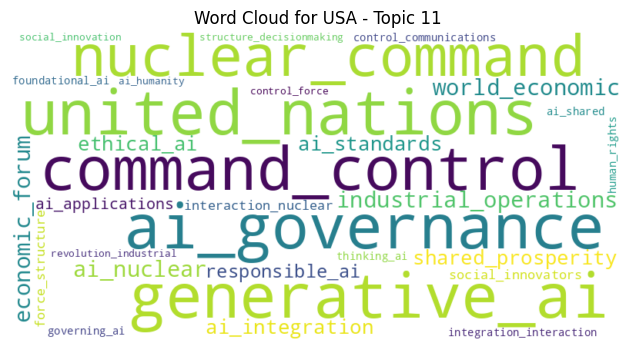

In [ ]:
# Word cloud by topic and country
for (country, topic), group in data_with_topic[data_with_topic.Topic != -1].groupby(['Country', 'Topic']):
    bigrams = ' '.join([re.sub(' ', '_', bigram) for words in data_with_topic['Representation'][:2] for bigram in words])

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color="white", max_font_size=80, min_font_size=10).generate(bigrams)

    # Plotting the WordCloud with Country and Topic information
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {country} - Topic {topic}")
    plt.savefig(file_path + f"graph/[Country]wordcloud_{country}_topic_{topic}.png", format="png", dpi=300, bbox_inches="tight")

    plt.show()

In [ ]:
file_path

'/content/drive/MyDrive/kdis_python/python_project/'

In [ ]:
import shutil

folder_path = file_path+"/graph"
output_zip_path = file_path+"/graph.zip"  # 저장할 ZIP 파일 경로
shutil.make_archive(output_zip_path.replace('.zip', ''), 'zip', folder_path)


'/content/drive/MyDrive/kdis_python/python_project/graph.zip'

# END
---

In [ ]:
 data_with_topic['cleaned_doc'].str.contains("efrfmnoesgm", case=False).sum()

1

In [ ]:
south_korea_count = data_with_topic['cleaned_doc'].str.contains("South Korea", case=False).sum()
print(south_korea_count)
data_with_topic[data_with_topic['cleaned_doc'].str.contains("South Korea", case=False)]

23


Unnamed: 0   id                                              Title  \
1             2    3        Using AI in Industrial Operations Guidebook   
4             5    6  Can democracies cooperate with China on AI res...   
16           21   24                            Financing “The New Oil”   
22           29   32  Assessing the Global Research Landscape at the...   
27           34   38  Is Artificial Intelligence Generating a New Pa...   
36           44   50  Harnessing the AI Revolution in Industrial Ope...   
42           50   56  Regulating Artificial Intelligence: The Risks ...   
68           81   88  Reporting on artificial intelligence: a handbo...   
69           84   91                 Generative Artificial Intelligence   
70           85   92  Global Assessment of Responsible AI in Cities ...   
87          106  114  Artificial intelligence (AI) and human rights ...   
88          107  115  Artificial intelligence (AI) and human rights:...   
90          110  119  The Inigo Montoya Problem for Trustworthy AI (...   
98          121  132               Assessing South Korea’s AI Ecosystem   
100         123  134  S.Hrg. 118-66 — ARTIFICIAL INTELLIGENCE AND IN...   
115         140  156         How Can Ai Policy Support Economic Growth?   
121         150  169                                     Generation AI?   
136         170  192  Trends in the use of AI in science - Publicati...   
138         172  194      How Might AI Affect the Future of Journalism?   
153         194  218  Charting the Geopolitics and European Governan...   
155         196  220  Ideas Without Scale in French Artificial Intel...   
156         197  222  BPI (British Recorded Music Industry) Ltd (LLM...   
168         212  237                       The Generative AI Revolution   

    Translated title   Published  \
1                NaN  2023-10-09   
4                NaN  2023-01-09   
16               NaN  2023-05-01   
22               NaN  2023-11-01   
27               NaN  2024-07-27   
36               NaN  2023-10-16   
42               NaN  2023-10-10   
68               NaN  2023-06-05   
69               NaN  2023-06-28   
70               NaN  2024-08-21   
87               NaN  2024-06-11   
88               NaN  2024-04-30   
90               NaN  2023-10-01   
98               NaN  2023-08-01   
100              NaN  2023-12-01   
115              NaN  2024-04-15   
121              NaN  2024-06-21   
136              NaN  2023-06-09   
138              NaN  2024-08-20   
153              NaN  2024-03-06   
155              NaN  2023-06-26   
156              NaN  2023-10-27   
168              NaN  2023-05-03   

                                                   URL  \
1    https://www.weforum.org/whitepapers/harnessing...   
4    https://www.brookings.edu/research/can-democra...   
16   https://cset.georgetown.edu/publication/financ...   
22   https://cset.georgetown.edu/publication/assess...   
27   https://www.iza.org/publications/dp/17183/is-a...   
36   https://www.weforum.org/publications/harnessin...   
42   https://cps.org.uk/research/regulating-artific...   
68   https://unesdoc.unesco.org/notice?id=p::usmarc...   
69   https://openknowledge.worldbank.org/handle/109...   
70   https://unhabitat.org/sites/default/files/2024...   
87   https://op.europa.eu/en/publication-detail/-/p...   
88   https://www.europarl.europa.eu/RegData/etudes/...   
90   https://cset.georgetown.edu/publication/the-in...   
98   https://cset.georgetown.edu/publication/assess...   
100  https://www.congress.gov/event/118th-congress/...   
115  https://www.frontier-economics.com/media/jyzdb...   
121  https://www.brightblue.org.uk/portfolio/genera...   
136  https://op.europa.eu/en/publication-detail/-/p...   
138  https://www.opensocietyfoundations.org/publica...   
153  https://carnegieeurope.eu/2024/03/06/charting-...   
155  https://www.ofce.sciences-po.fr/pdf/pbrief/202...   
156  https://committees.parliament.uk/writteneviden...   
168  